In [3]:
import io
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras import regularizers

In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/tmp/robert_frost.txt'
with open(file_path, 'r') as f:
    data= f.read()

In [5]:
data

'Two roads diverged in a yellow wood,\nAnd sorry I could not travel both\nAnd be one traveler, long I stood\nAnd looked down one as far as I could\nTo where it bent in the undergrowth; \n\nThen took the other, as just as fair,\nAnd having perhaps the better claim\nBecause it was grassy and wanted wear,\nThough as for that the passing there\nHad worn them really about the same,\n\nAnd both that morning equally lay\nIn leaves no step had trodden black.\nOh, I kept the first for another day! \nYet knowing how way leads on to way\nI doubted if I should ever come back.\n\nI shall be telling this with a sigh\nSomewhere ages and ages hence:\nTwo roads diverged in a wood, and I,\nI took the one less traveled by,\nAnd that has made all the difference.\n\nWhose woods these are I think I know.\nHis house is in the village, though; \nHe will not see me stopping here\nTo watch his woods fill up with snow.\n\nMy little horse must think it queer\nTo stop without a farmhouse near\nBetween the woods an

In [6]:
vocab_size = 10000
embedding_dim = 124
n_gram_sequences=[]

corpus = data.lower().split('\n')

In [7]:
corpus[:10]

['two roads diverged in a yellow wood,',
 'and sorry i could not travel both',
 'and be one traveler, long i stood',
 'and looked down one as far as i could',
 'to where it bent in the undergrowth; ',
 '',
 'then took the other, as just as fair,',
 'and having perhaps the better claim',
 'because it was grassy and wanted wear,',
 'though as for that the passing there']

In [8]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
print(tokenizer.word_index)
total_words = len(tokenizer.word_index) +1

{'<OOV>': 1, 'the': 2, 'to': 3, 'and': 4, 'i': 5, 'a': 6, 'of': 7, "'": 8, 'in': 9, 'it': 10, 'you': 11, 'he': 12, 'that': 13, 'was': 14, 'for': 15, 'but': 16, 'me': 17, 'as': 18, 'on': 19, 'with': 20, 'all': 21, 'what': 22, 'one': 23, 'they': 24, 'be': 25, 'had': 26, 'we': 27, 'if': 28, 'is': 29, 'his': 30, 'have': 31, 'not': 32, 'out': 33, 'up': 34, 'him': 35, 'see': 36, 'from': 37, 'them': 38, 'her': 39, 'like': 40, 'she': 41, 'there': 42, 'where': 43, 'or': 44, 'at': 45, 'no': 46, 'by': 47, 'my': 48, 'so': 49, 'when': 50, 'say': 51, 'this': 52, 'know': 53, 'some': 54, 'were': 55, "it's": 56, "don't": 57, 'do': 58, 'here': 59, 'said': 60, 'too': 61, 'down': 62, 'are': 63, 'can': 64, 'been': 65, 'off': 66, 'now': 67, 'old': 68, 'tell': 69, 'could': 70, 'then': 71, 'way': 72, "he's": 73, "'i": 74, 'come': 75, 'make': 76, 'door': 77, 'think': 78, 'must': 79, 'an': 80, 'your': 81, 'though': 82, 'will': 83, 'only': 84, 'good': 85, 'let': 86, 'cellar': 87, 'just': 88, 'back': 89, 'would':

In [9]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
	  n_gram_sequence = token_list[:i+1]
	  input_sequences.append(n_gram_sequence)
	  print(n_gram_sequence)

Streaming output truncated to the last 5000 lines.
[166, 28, 12, 55, 59, 5, 57, 341]
[70, 69]
[70, 69, 11]
[70, 69, 11, 180]
[70, 69, 11, 180, 12]
[70, 69, 11, 180, 12, 169]
[70, 69, 11, 180, 12, 169, 811]
[70, 69, 11, 180, 12, 169, 811, 318]
[41, 393]
[41, 393, 280]
[41, 393, 280, 2]
[41, 393, 280, 2, 546]
[41, 393, 280, 2, 546, 1567]
[41, 393, 280, 2, 546, 1567, 41]
[41, 393, 280, 2, 546, 1567, 41, 257]
[342, 2]
[342, 2, 1568]
[342, 2, 1568, 1569]
[342, 2, 1568, 1569, 33]
[342, 2, 1568, 1569, 33, 9]
[342, 2, 1568, 1569, 33, 9, 39]
[342, 2, 1568, 1569, 33, 9, 39, 812]
[5, 1570]
[5, 1570, 2]
[5, 1570, 2, 220]
[5, 1570, 2, 220, 1571]
[5, 1570, 2, 220, 1571, 590]
[5, 1570, 2, 220, 1571, 590, 166]
[2, 1572]
[2, 1572, 1573]
[2, 1572, 1573, 290]
[2, 1572, 1573, 290, 60]
[2, 1572, 1573, 290, 60, 166]
[2, 1572, 1573, 290, 60, 166, 1574]
[2, 467]
[2, 467, 14]
[2, 467, 14, 380]
[2, 467, 14, 380, 33]
[2, 467, 14, 380, 33, 7]
[2, 467, 14, 380, 33, 7, 305]
[2, 641]
[2, 641, 7]
[2, 641, 7, 553]
[2,

In [10]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(input_sequences[:10])

[[  0   0   0   0   0   0   0   0   0   0  98 581]
 [  0   0   0   0   0   0   0   0   0  98 581 582]
 [  0   0   0   0   0   0   0   0  98 581 582   9]
 [  0   0   0   0   0   0   0  98 581 582   9   6]
 [  0   0   0   0   0   0  98 581 582   9   6 583]
 [  0   0   0   0   0  98 581 582   9   6 583 584]
 [  0   0   0   0   0   0   0   0   0   0   4 585]
 [  0   0   0   0   0   0   0   0   0   4 585   5]
 [  0   0   0   0   0   0   0   0   4 585   5  70]
 [  0   0   0   0   0   0   0   4 585   5  70  32]]


In [11]:
X, Y = input_sequences[:,:-1],input_sequences[:,-1]

Y = tf.keras.utils.to_categorical(Y, num_classes=total_words)

print(Y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.LSTM(520, return_sequences=True),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(340, return_sequences=True)),

                                    tf.keras.layers.GlobalMaxPooling1D(),
                                    tf.keras.layers.Dense(total_words/2, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                                    tf.keras.layers.Dense(total_words, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 11, 124)           281976    
                                                                 
 dropout (Dropout)           (None, 11, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 11, 520)           1341600   
                                                                 
 bidirectional (Bidirectiona  (None, 11, 680)          2341920   
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 680)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1137)              7

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=0, patience=20, restore_best_weights=True)
history = model.fit(X, Y, epochs =200, verbose=1, callbacks=[early_stop])

Epoch 1/200
298/298 [==============================] - 16s 29ms/step - loss: 0.7656 - accuracy: 0.8503
Epoch 2/200
298/298 [==============================] - 6s 21ms/step - loss: 0.7552 - accuracy: 0.8467
Epoch 3/200
298/298 [==============================] - 5s 17ms/step - loss: 0.7401 - accuracy: 0.8505
Epoch 4/200
298/298 [==============================] - 3s 11ms/step - loss: 0.7261 - accuracy: 0.8528
Epoch 5/200
298/298 [==============================] - 3s 11ms/step - loss: 0.7181 - accuracy: 0.8517
Epoch 6/200
298/298 [==============================] - 4s 13ms/step - loss: 0.7253 - accuracy: 0.8502
Epoch 7/200
298/298 [==============================] - 3s 11ms/step - loss: 0.7110 - accuracy: 0.8522
Epoch 8/200
298/298 [==============================] - 3s 10ms/step - loss: 0.7099 - accuracy: 0.8535
Epoch 9/200
298/298 [==============================] - 3s 10ms/step - loss: 0.7325 - accuracy: 0.8478
Epoch 10/200
298/298 [==============================] - 4s 12ms/step - loss: 0.74

In [30]:
model.save('/content/drive/MyDrive/Colab Notebooks/tmp/lecture19.h5')

In [12]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/tmp/lecture19.h5')

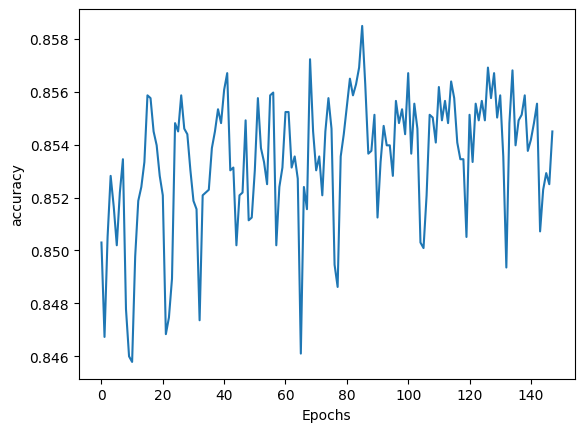

In [31]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [14]:
seed_text = 'i am feeling good today'
next_words =20

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], padding='pre', maxlen =max_sequence_len-1)


    predicted = model.predict(token_list)
    predicted = np.argmax(predicted, axis=-1)[0]
    #predicted = np.argmax(model.predict(token_list), axis=-1)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 29ms/step
i am feeling good today they was just they ride ' ' me all outdoors things ' now do it ' me ' we're all
